In [1]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [3]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [5]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

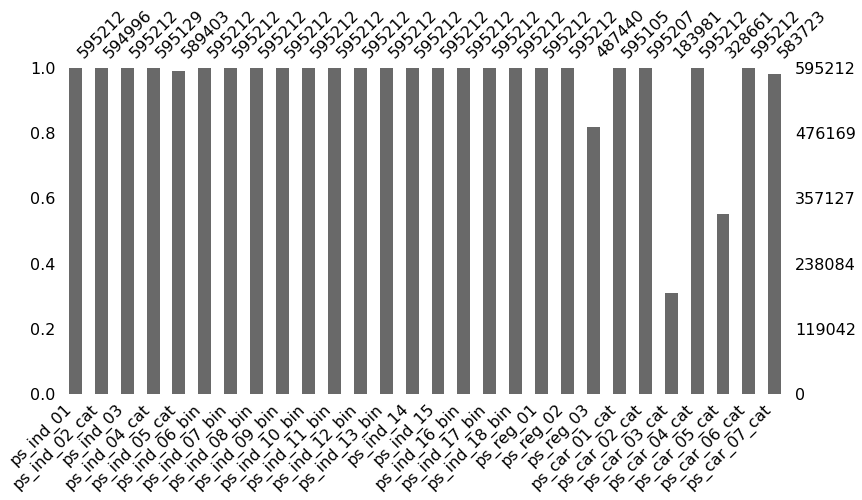

In [7]:
import numpy as np
import missingno as msno

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화 (처음 28개만)
msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6));

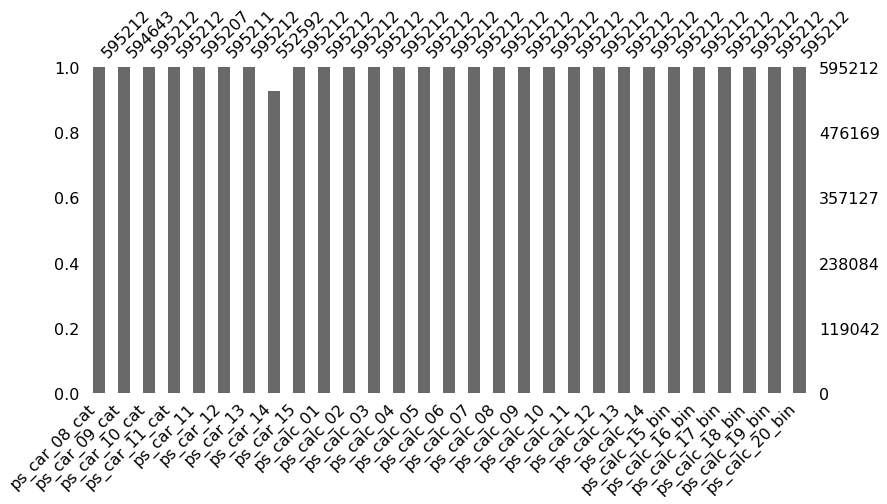

In [8]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

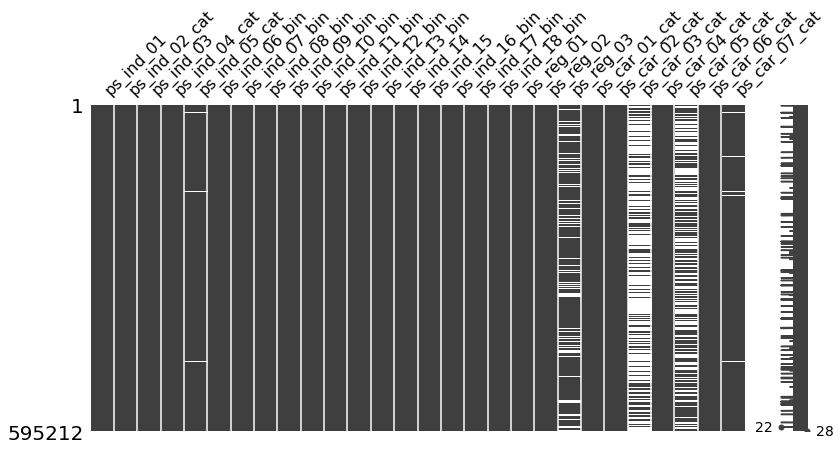

In [9]:
# 결측값 매트릭스 형태로 시각화하기
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

In [10]:
def resumetable(df):
    print(f'데이터셋 형상:{df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1의 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col=='target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
            
    return summary

In [11]:
summary = resumetable(train)
summary

데이터셋 형상:(595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [12]:
summary[summary['데이터 종류']=='명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [13]:
summary[summary['데이터 타입'] =='float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 데이터 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

* 타겟값 분포

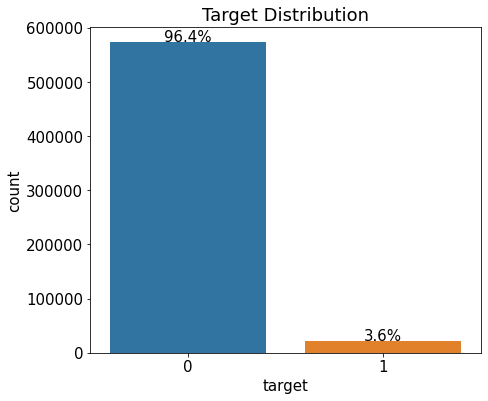

In [15]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타겟값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타겟값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬

mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

### 이진 피처

In [16]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size)                           # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols)       # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)        # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

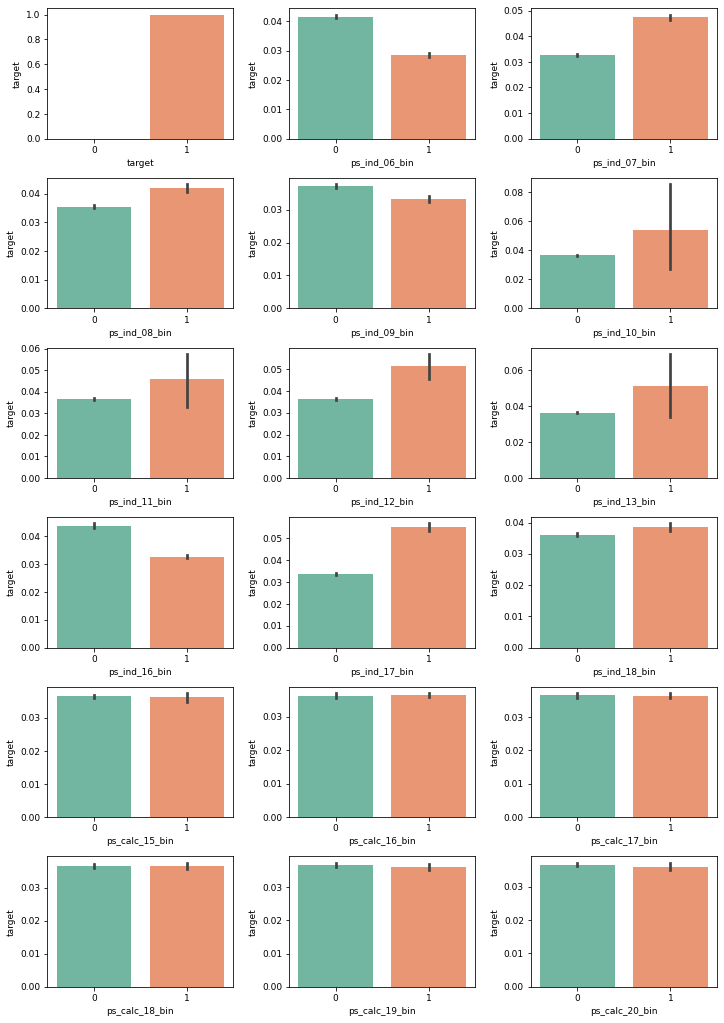

In [17]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index  # 이진 피처
# 이진 피처 고윳값별 타겟값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3)  # 6행 3열 배치

* ps_ind_10_bin ~ 13 : 신뢰구간이 넓어서 통계적 유효성이 떨어짐
* ps_calc_15_bin ~ 20 : 고윳값별 타겟값 비율 차이가 없어 타겟값 예측력이 없음

### 명목형 피처

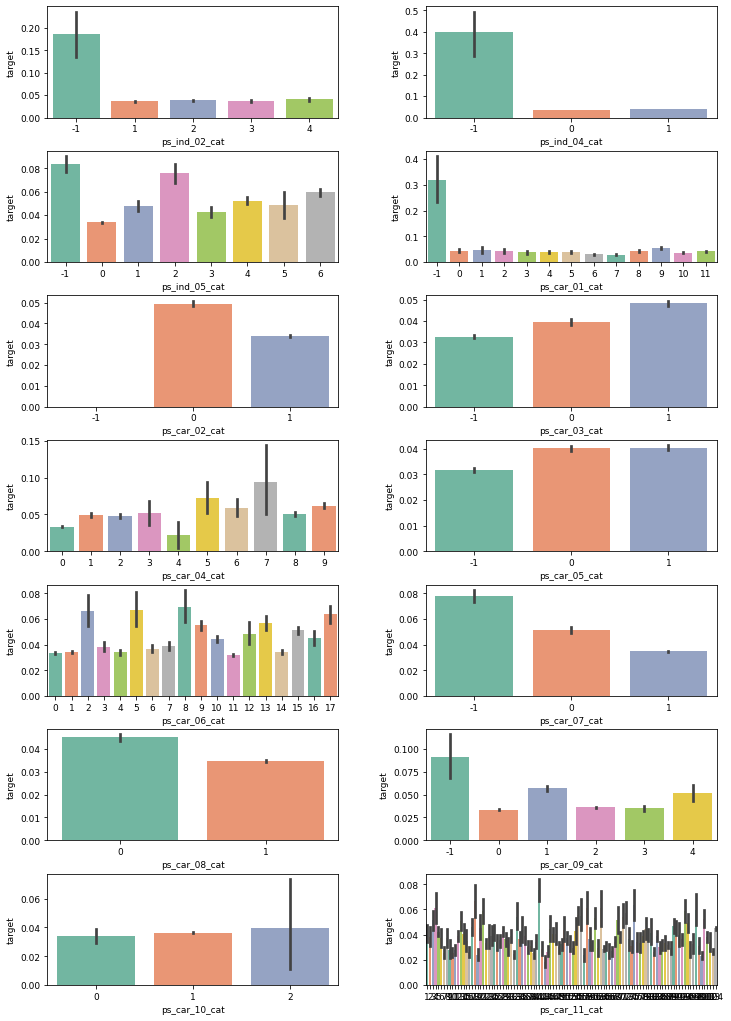

In [18]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index   # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7,2 )  # 7행 2열

* ps_ind_02_cat의 경우 결측값 -1이 다른 고윳값보다 타겟값 1의 비율이 큼. 신뢰구간이 넓다해도 비율이 크기 때문에 다른 값으로 대체하지않고 진행
* ps_car_02_cat : -1일때 타겟값 1비율은 0. 이경우 -1이면 0이라고 판단 가능.

### 순서형 피처

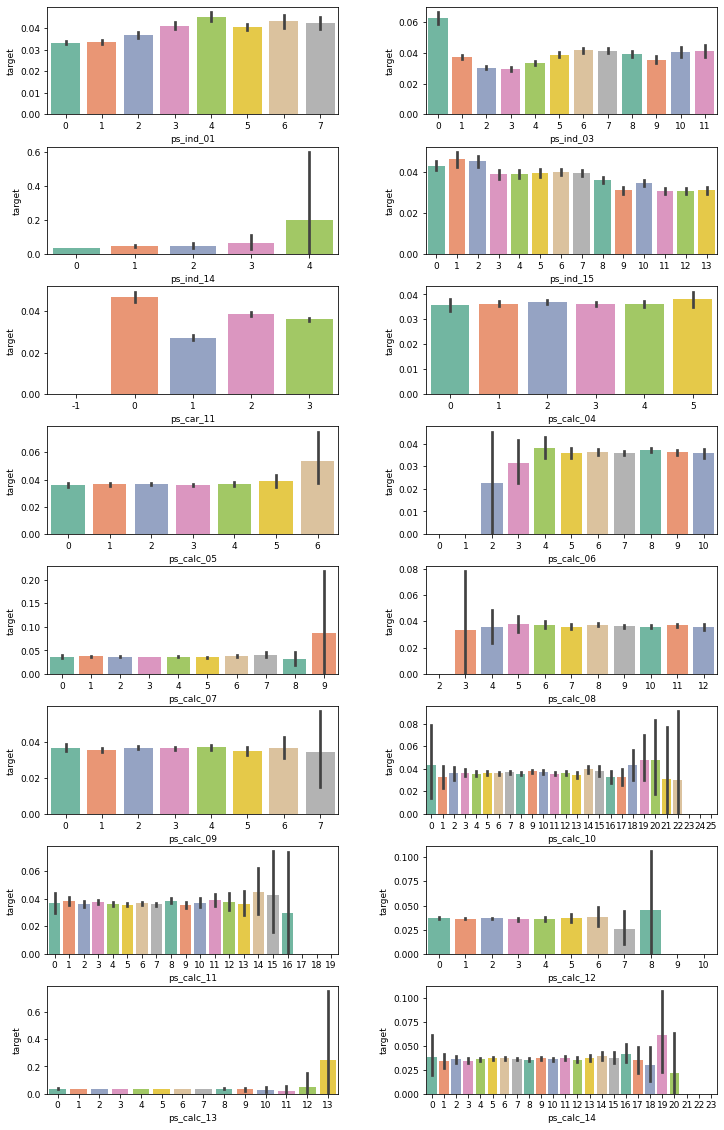

In [19]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index    # 순서형 피처
plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))  # 8행 2열

* ps_ind_14 : 고윳값 4의 신뢰구간이 상당히 넓어 통계적 유효성 떨어짐. 제거
* ps_calc_4 ~ 14 : 고윳값별 타겟값 비율이 거의 비슷함. 다르더라도 신뢰구간이 넓어서 통계적 유효성이 떨어지므로 제거.